# Sentiment Analysis with TextBlob

In here used relabeled dataset & its contain more than 10000 data.

In [39]:
# Importing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from sklearn.metrics import confusion_matrix, accuracy_score

## Load data

In [40]:
student_feedback=pd.read_excel('student_feedback_train.xlsx',index_col=False)
student_feedback

,sentence,topic,Score sentiment,Sentiment Range,Sentiment Label
0,The cost of this job is very demanding and the...,tutor,0.500000,0.5,Neutral
1,There are not enough people to listen and list...,tutor,0.500000,0.5,Neutral
2,The price of this job is so small that it cann...,tutor,0.500000,0.5,Neutral
3,"Mom—I don't know what I'm talking about, I don...",tutor,0.500000,0.5,Neutral
4,The price of the job is too low for the sales ...,tutor,0.500000,0.5,Neutral
...,...,...,...,...,...
10141,item practical useful,others,0.967135,1.0,Positive
10142,good understanding always evaluating price,others,0.953008,1.0,Positive
10143,fish price unreliable price high price range,others,0.802780,0.9,Positive
10144,detailed quite bit detailed analysis,others,0.928498,1.0,Positive


In [41]:
student_feedback['Sentiment Label'] = student_feedback['Sentiment Label'].str.lower()


In [42]:
student_feedback.shape

(10146, 5)

In [43]:
student_feedback['Sentiment Label'].value_counts()

Sentiment Label
positive    4479
negative    3359
neutral     2308
Name: count, dtype: int64

C:\Users\ashik\AppData\Local\Temp\ipykernel_18628\1225210926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


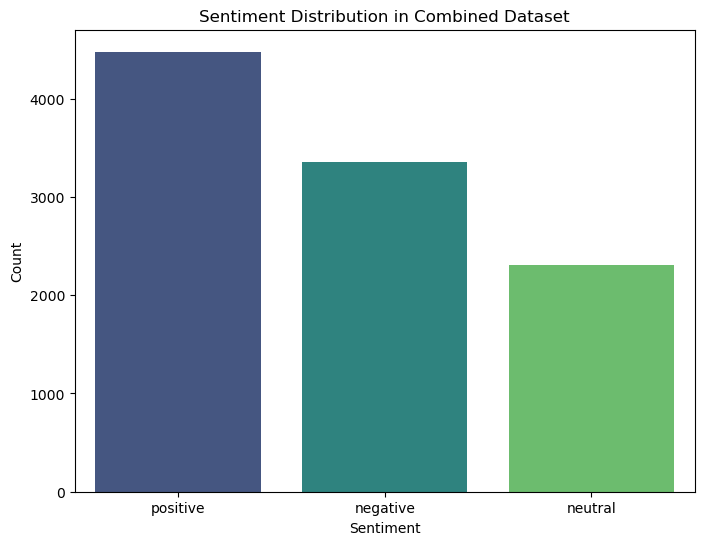

In [44]:
# Assuming there's a column named 'sentiment' with values 'positive', 'negative', 'neutral'
sentiment_counts = student_feedback['Sentiment Label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution in Combined Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show();

In [45]:
topic_counts = student_feedback['topic'].value_counts()

C:\Users\ashik\AppData\Local\Temp\ipykernel_18628\1712054453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="plasma")


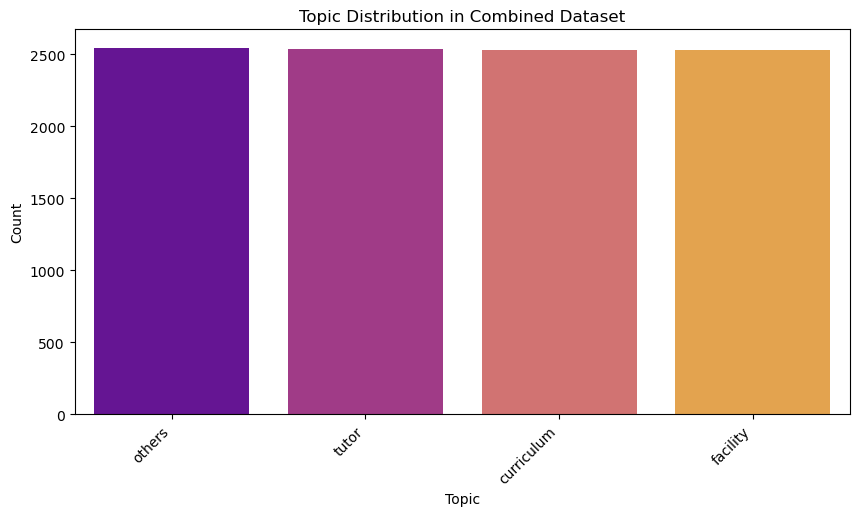

In [46]:
# Plotting Topic Distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="plasma")
plt.title("Topic Distribution in Combined Dataset")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

## Sentimant Analysis using TextBlob

In [47]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    return polarity

In [67]:
def get_subjectivity(text):
    analysis = TextBlob(text)
    subjectivity = analysis.sentiment.subjectivity
    return subjectivity

In [48]:
type(student_feedback['sentence'])

pandas.core.series.Series

In [49]:
student_feedback['sentence'][0]

'The cost of this job is very demanding and the students are not able to cope with it.'

In [71]:
print(f"Polarity:{get_sentiment(student_feedback['sentence'][0])}")
print(f"subjectivity:{get_subjectivity(student_feedback['sentence'][0])}")

Polarity:-0.024999999999999994
subjectivity:0.4625


In [72]:
# Convert the 'sentence' column to strings
student_feedback['sentence'] = student_feedback['sentence'].astype(str)
student_feedback['polarity_score']=student_feedback['sentence'].apply(get_sentiment)

In [73]:
student_feedback['subjectivity_score'] = student_feedback['sentence'].apply(get_subjectivity)


In [74]:
student_feedback

,sentence,topic,Score sentiment,Sentiment Range,Sentiment Label,polarity_score,testBlob_label,testBlob_label_1,subjectivity_score
0,The cost of this job is very demanding and the...,tutor,0.500000,0.5,neutral,-0.025000,negative,neutral,0.462500
1,There are not enough people to listen and list...,tutor,0.500000,0.5,neutral,0.000000,neutral,neutral,0.500000
2,The price of this job is so small that it cann...,tutor,0.500000,0.5,neutral,-0.125000,negative,negative,0.400000
3,"Mom—I don't know what I'm talking about, I don...",tutor,0.500000,0.5,neutral,0.000000,neutral,neutral,0.000000
4,The price of the job is too low for the sales ...,tutor,0.500000,0.5,neutral,-0.062500,negative,neutral,0.337500
...,...,...,...,...,...,...,...,...,...
10141,item practical useful,others,0.967135,1.0,positive,0.300000,positive,positive,0.000000
10142,good understanding always evaluating price,others,0.953008,1.0,positive,0.700000,positive,positive,0.600000
10143,fish price unreliable price high price range,others,0.802780,0.9,positive,0.160000,positive,positive,0.540000
10144,detailed quite bit detailed analysis,others,0.928498,1.0,positive,0.400000,positive,positive,0.750000


In [53]:
student_feedback['polarity_score'].value_counts()

polarity_score
 0.000000    3305
 0.200000     441
 0.500000     411
-0.125000     305
 0.250000     191
             ... 
-0.600000       1
-0.048611       1
-0.183333       1
 0.016667       1
-0.181818       1
Name: count, Length: 1131, dtype: int64

## Analysis the Results

### Sentimant/Polarity

Polarity measures the sentiment of a text, indicating whether it is positive, negative, or neutral. A score close to 1 suggests positive sentiment, a score close to -1 indicates negative sentiment, and a score around 0 reflects neutrality.

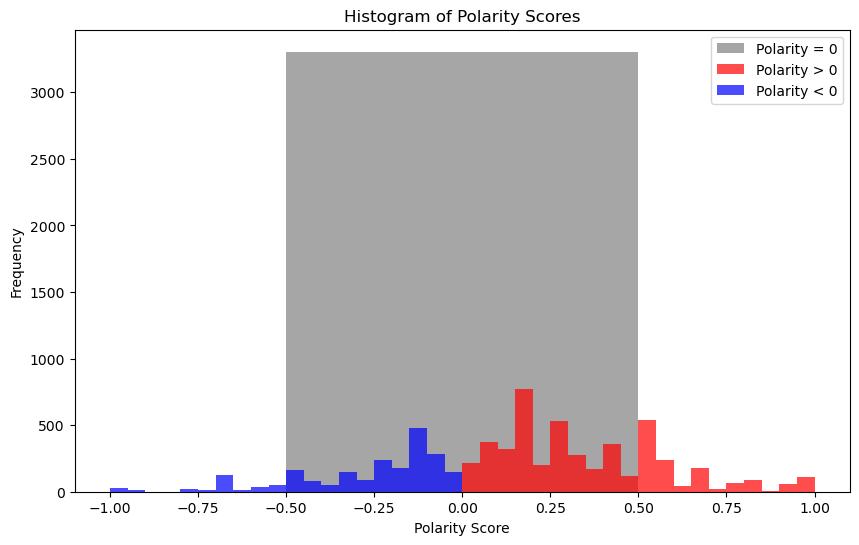

In [54]:
# Categorize polarity scores
polarity_zero = student_feedback[student_feedback['polarity_score'] == 0]
polarity_positive = student_feedback[student_feedback['polarity_score'] > 0]
polarity_negative = student_feedback[student_feedback['polarity_score'] < 0]

# Plot the histogram
plt.figure(figsize=(10, 6))

# Histogram for polarity = 0
plt.hist(polarity_zero['polarity_score'], bins=1, alpha=0.7, label='Polarity = 0', color='grey')

# Histogram for polarity > 0
plt.hist(polarity_positive['polarity_score'], bins=20, alpha=0.7, label='Polarity > 0', color='red')

# Histogram for polarity < 0
plt.hist(polarity_negative['polarity_score'], bins=20, alpha=0.7, label='Polarity < 0', color='blue')

# Adding labels and title
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Polarity Scores')
plt.legend()

# Show the plot
plt.show()

In [55]:
student_feedback['Sentiment Label'].value_counts()

Sentiment Label
positive    4479
negative    3359
neutral     2308
Name: count, dtype: int64

The function `classify_polarity` is designed to categorize the sentiment polarity of a text into three labels: 'negative', 'positive', or 'neutral'. It assigns 'negative' to polarities less than 0, 'positive' to polarities greater than 0, and 'neutral' to a polarity exactly equal to 0. This function is applied to the `polarity_score` column of the `student_feedback` DataFrame to create a new column, `testBlob_label`, which contains the sentiment classification for each entry.

In [56]:
# Define the conditions and corresponding labels
def classify_polarity(polarity):
    if polarity < 0:
        return 'negative'
    elif polarity > 0:
        return 'positive'
    else:
        return 'neutral'

In [57]:
# Apply the function to create the 'testBlob_label' column
student_feedback['testBlob_label'] = student_feedback['polarity_score'].apply(classify_polarity)

In [58]:
student_feedback['testBlob_label'].value_counts()

testBlob_label
positive    4693
neutral     3305
negative    2148
Name: count, dtype: int64

In [59]:
student_feedback

,sentence,topic,Score sentiment,Sentiment Range,Sentiment Label,polarity_score,testBlob_label
0,The cost of this job is very demanding and the...,tutor,0.500000,0.5,neutral,-0.025000,negative
1,There are not enough people to listen and list...,tutor,0.500000,0.5,neutral,0.000000,neutral
2,The price of this job is so small that it cann...,tutor,0.500000,0.5,neutral,-0.125000,negative
3,"Mom—I don't know what I'm talking about, I don...",tutor,0.500000,0.5,neutral,0.000000,neutral
4,The price of the job is too low for the sales ...,tutor,0.500000,0.5,neutral,-0.062500,negative
...,...,...,...,...,...,...,...
10141,item practical useful,others,0.967135,1.0,positive,0.300000,positive
10142,good understanding always evaluating price,others,0.953008,1.0,positive,0.700000,positive
10143,fish price unreliable price high price range,others,0.802780,0.9,positive,0.160000,positive
10144,detailed quite bit detailed analysis,others,0.928498,1.0,positive,0.400000,positive


In [60]:
def calculate_sentiment_accuracy(df, true_label_col, predicted_label_col):
    """
    Calculate and print the overall accuracy and accuracy for each sentiment category.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the true and predicted labels.
    - true_label_col (str): The column name for the true sentiment labels.
    - predicted_label_col (str): The column name for the predicted sentiment labels.
    """
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(df[true_label_col], df[predicted_label_col], labels=['positive', 'negative', 'neutral'])
    
    # Create a DataFrame to better visualize the confusion matrix
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['positive', 'negative', 'neutral'], columns=['positive', 'negative', 'neutral'])

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(df[true_label_col], df[predicted_label_col])

    # Calculate accuracy for each sentiment category
    positive_accuracy = conf_matrix_df.loc['positive', 'positive'] / conf_matrix_df.loc['positive'].sum()
    negative_accuracy = conf_matrix_df.loc['negative', 'negative'] / conf_matrix_df.loc['negative'].sum()
    neutral_accuracy = conf_matrix_df.loc['neutral', 'neutral'] / conf_matrix_df.loc['neutral'].sum()

    # Print the results
    print("Confusion Matrix:")
    print(conf_matrix_df)
    print("\nOverall Accuracy: {:.2f}".format(overall_accuracy))
    print("Positive Accuracy: {:.2f}".format(positive_accuracy))
    print("Negative Accuracy: {:.2f}".format(negative_accuracy))
    print("Neutral Accuracy: {:.2f}".format(neutral_accuracy))

In [61]:
calculate_sentiment_accuracy(student_feedback, 'Sentiment Label', 'testBlob_label')

Confusion Matrix:
          positive  negative  neutral
positive      3002       422     1055
negative       989      1377      993
neutral        702       349     1257

Overall Accuracy: 0.56
Positive Accuracy: 0.67
Negative Accuracy: 0.41
Neutral Accuracy: 0.54


The function `classify_polarity` categorizes the sentiment polarity of a text into 'negative', 'positive', or 'neutral' based on specific thresholds. It classifies a polarity less than -0.1 as 'negative', a polarity greater than 0.1 as 'positive', and considers polarities between -0.1 and 0.1 as 'neutral'. This function is applied to the `polarity_score` column of the `student_feedback` DataFrame to create a new column, `testBlob_label_1`, containing these sentiment classifications.

In [64]:
# Define the conditions and corresponding labels
def classify_polarity(polarity):
    if polarity < -0.1:
        return 'negative'
    elif polarity > 0.1:
        return 'positive'
    else:
        return 'neutral'

student_feedback['testBlob_label_1'] = student_feedback['polarity_score'].apply(classify_polarity)
student_feedback['testBlob_label'].value_counts()

testBlob_label
positive    4693
neutral     3305
negative    2148
Name: count, dtype: int64

In [66]:
calculate_sentiment_accuracy(student_feedback, 'Sentiment Label', 'testBlob_label_1')

Confusion Matrix:
          positive  negative  neutral
positive      2723       274     1482
negative       804      1133     1422
neutral        582       235     1491

Overall Accuracy: 0.53
Positive Accuracy: 0.61
Negative Accuracy: 0.34
Neutral Accuracy: 0.65


### Subjectivity

Subjectivity measures how much a text expresses personal opinions, emotions, or biases, rather than objective facts. A score close to 0 indicates objectivity, while a score close to 1 indicates high subjectivity.

In [75]:
# Define the bins for subjectivity scores
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']

# Create a new column for the binned subjectivity scores
student_feedback['subjectivity_range'] = pd.cut(student_feedback['subjectivity_score'], bins=bins, labels=labels, include_lowest=True)

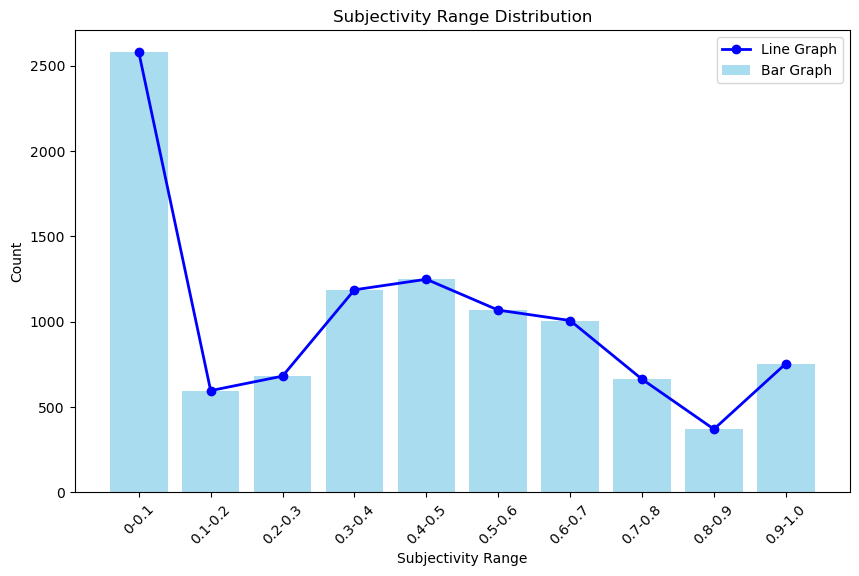

In [77]:
# Count the number of occurrences in each subjectivity range
subjectivity_counts = student_feedback['subjectivity_range'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))

# Bar graph
plt.bar(subjectivity_counts.index, subjectivity_counts.values, color='skyblue', alpha=0.7, label='Bar Graph')

# Line graph
plt.plot(subjectivity_counts.index, subjectivity_counts.values, color='blue', marker='o', linestyle='-', linewidth=2, label='Line Graph')

# Titles and labels
plt.title('Subjectivity Range Distribution')
plt.xlabel('Subjectivity Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()